In [1]:

from transformers import DetrFeatureExtractor, DetrForSegmentation
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pandas as pd

#url = 'https://th.bing.com/th/id/R.b2b382a7073417a863e779bf013cc6bc?rik=yM9XgXqY7dbcpw&riu=http%3a%2f%2fassets.menshealth.co.uk%2fmain%2fgallery%2f31425%2fmh-manwalking-31012011__resized.jpg&ehk=7lO%2fcK4h5PNk0IA4nIVDg8Nh449XDNQ8R%2fayvUoWgyM%3d&risl=&pid=ImgRaw&r=0'
#image = Image.open(requests.get(url, stream=True).raw)
repo = 'facebook/detr-resnet-101-panoptic'

fps = sorted(os.listdir('train_data/images/'))
images = [Image.open('train_data/images/' + fp) for fp in fps]
#images[0]

In [2]:
feature_extractor = DetrFeatureExtractor.from_pretrained(repo)
model = DetrForSegmentation.from_pretrained(repo)
inputs = feature_extractor(images=images[400], return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    
masks = outputs.pred_masks[0].cpu().numpy()

No pretrained weights exist for this model. Using random initialization.


0


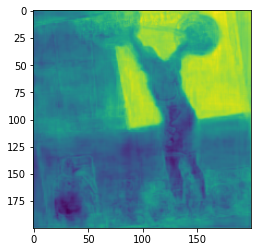

1


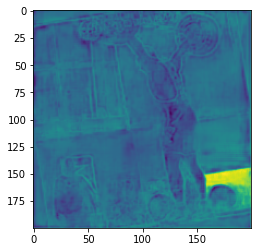

2


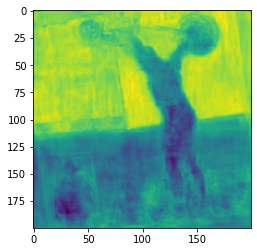

3


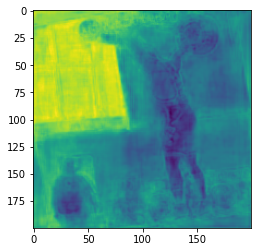

4


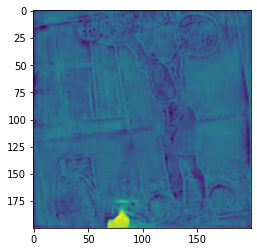

5


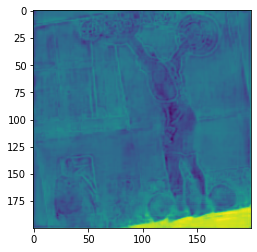

6


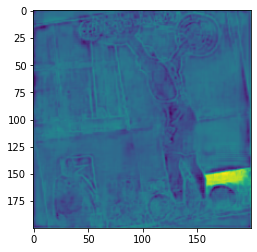

7


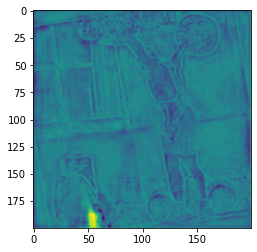

8


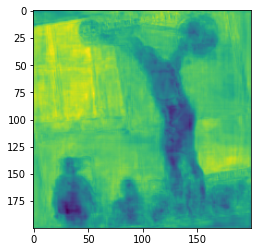

9


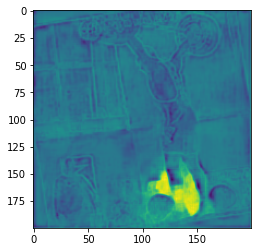

10


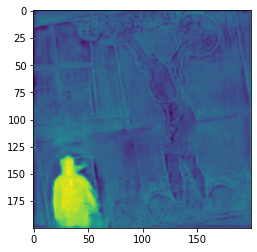

11


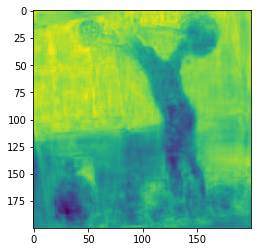

12


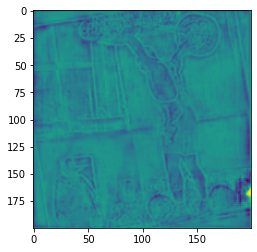

13


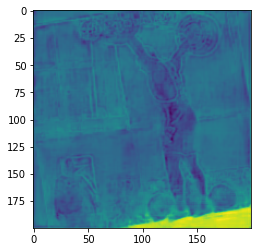

14


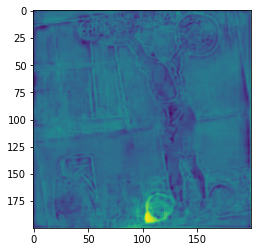

15


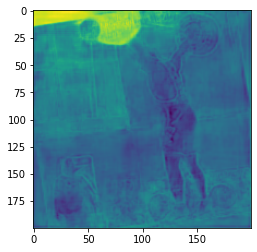

16


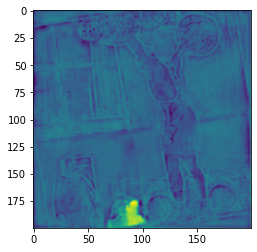

17


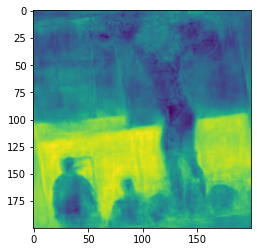

18


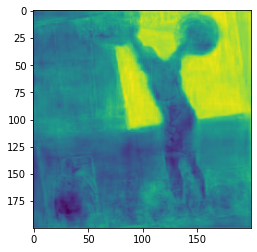

19


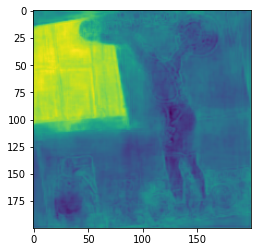

20


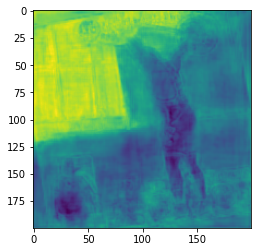

21


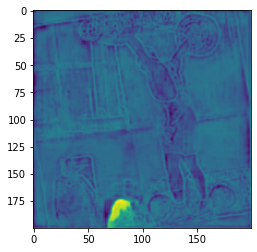

22


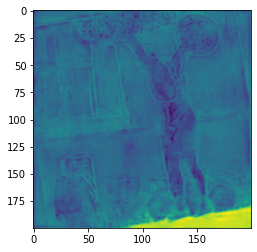

23


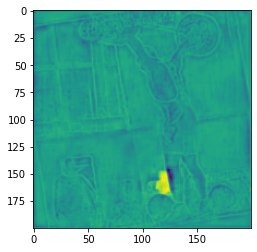

24


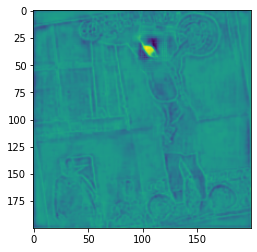

25


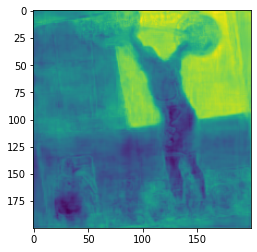

26


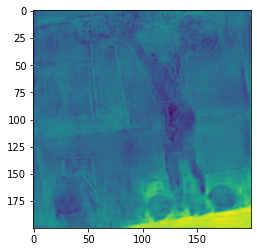

27


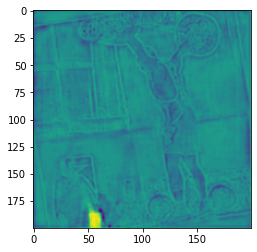

28


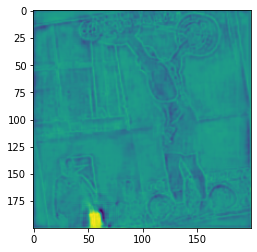

29


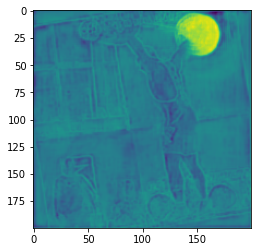

30


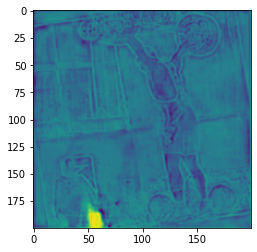

31


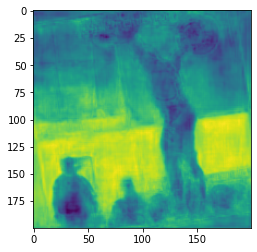

32


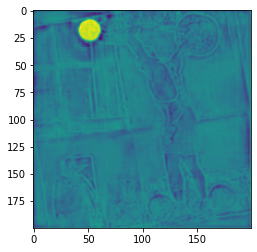

33


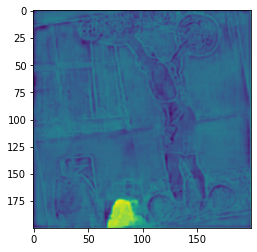

34


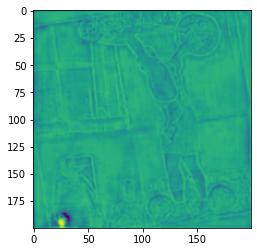

35


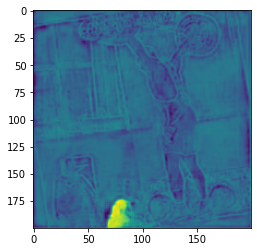

36


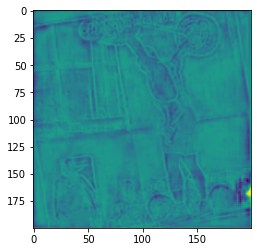

37


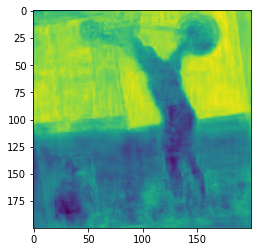

38


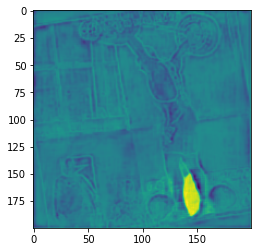

39


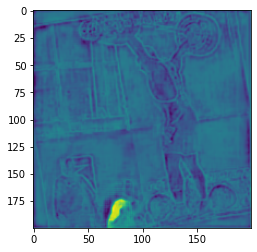

40


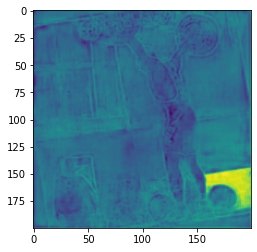

41


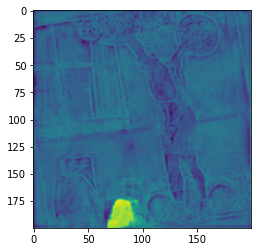

42


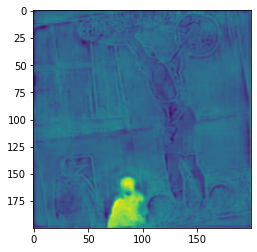

43


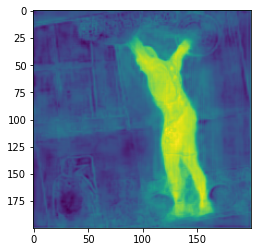

44


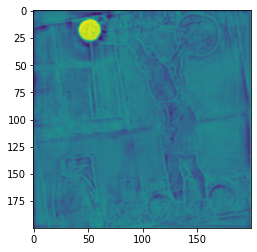

45


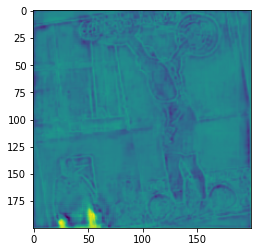

46


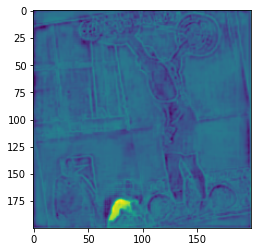

47


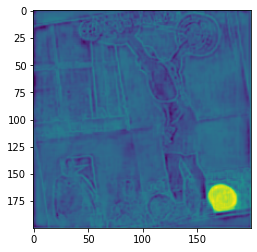

48


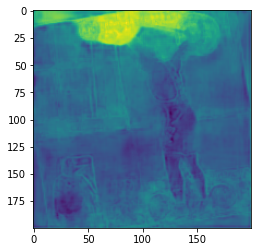

49


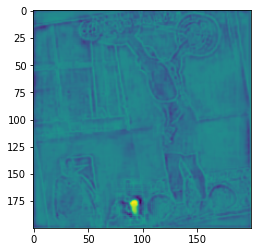

50


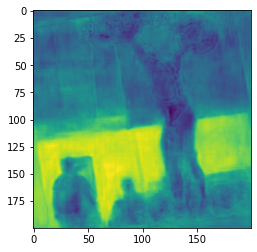

51


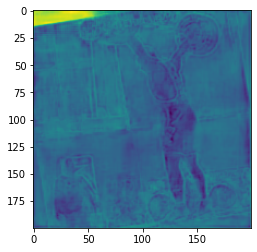

52


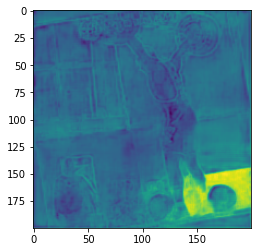

53


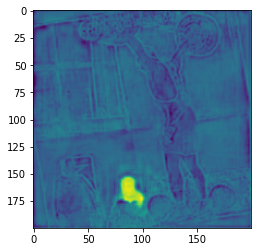

54


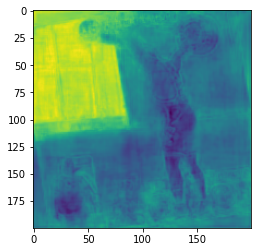

55


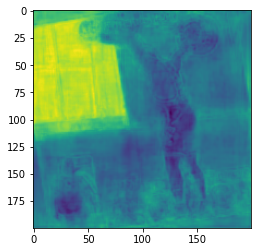

56


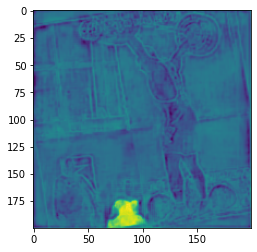

57


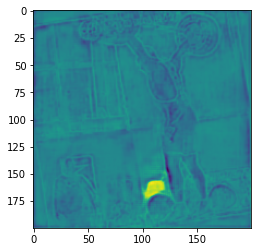

58


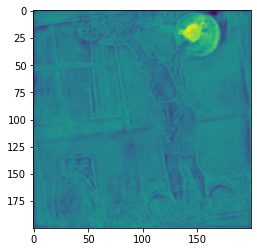

59


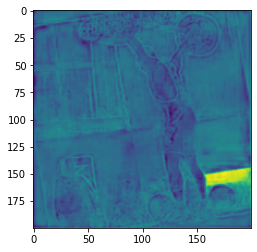

60


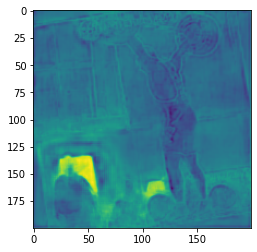

61


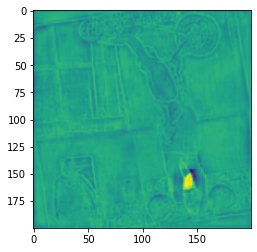

62


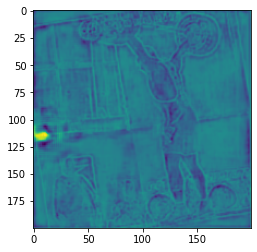

63


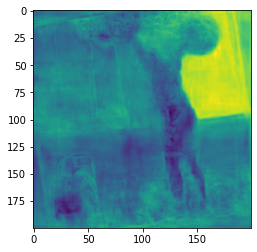

64


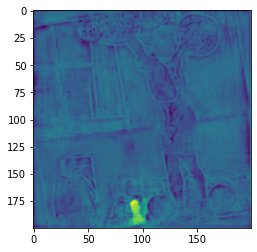

65


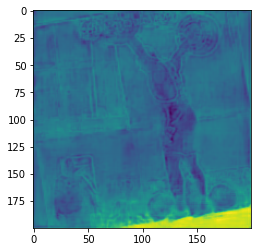

66


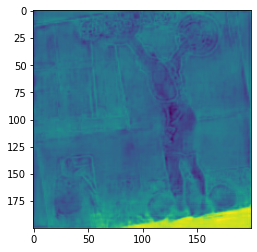

67


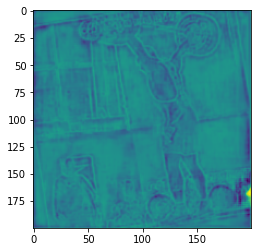

68


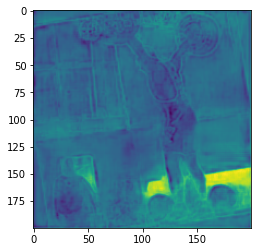

69


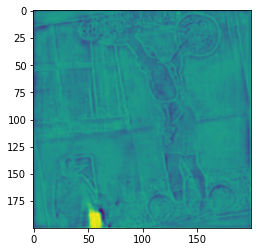

70


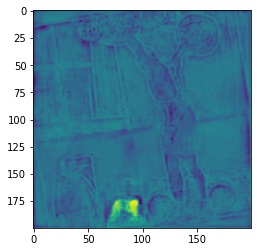

71


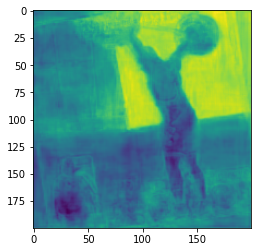

72


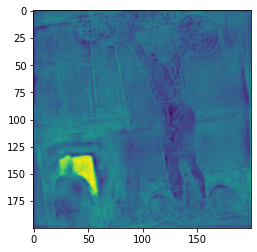

73


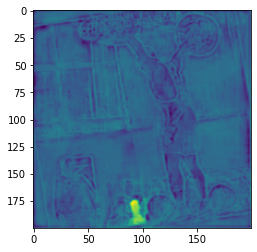

74


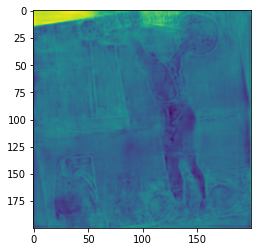

75


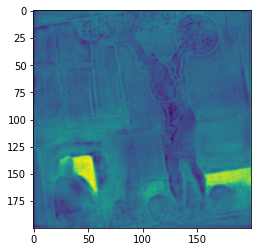

76


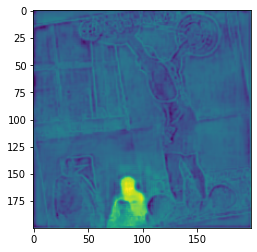

77


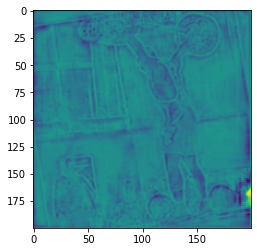

78


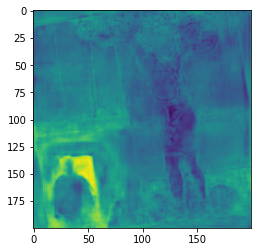

79


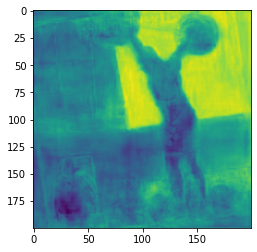

80


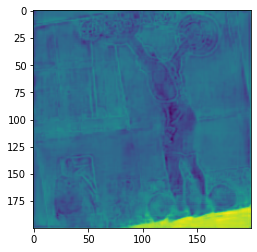

81


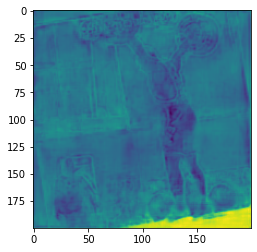

82


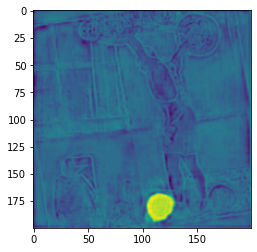

83


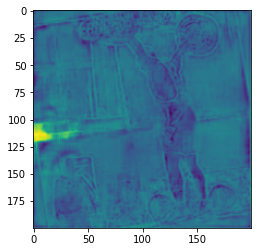

84


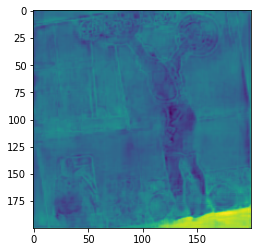

85


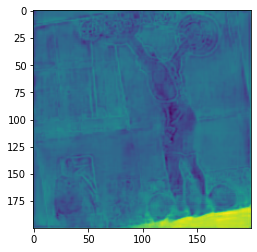

86


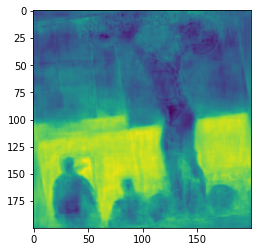

87


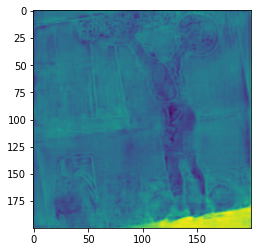

88


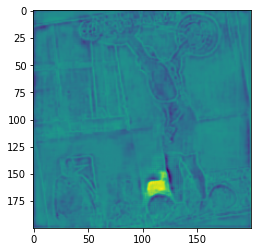

89


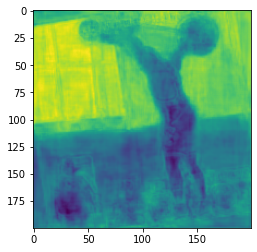

90


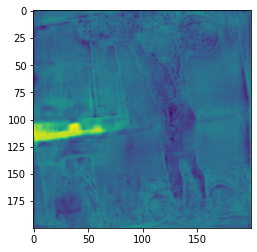

91


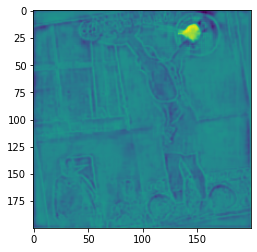

92


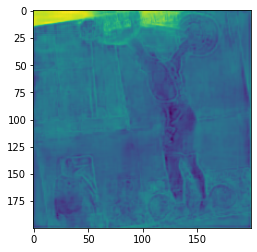

93


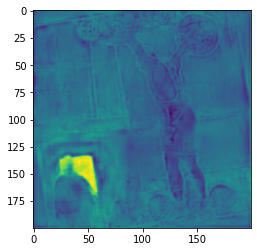

94


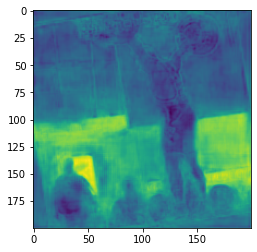

95


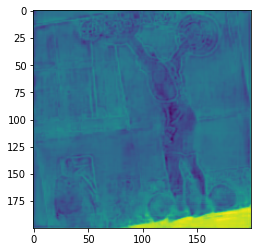

96


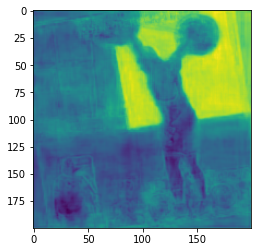

97


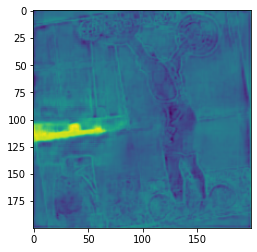

98


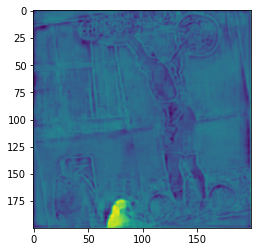

99


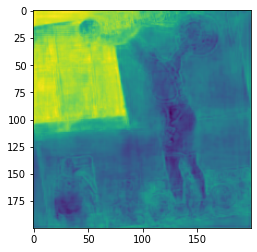

In [3]:

for idx, mask in enumerate(masks):
    #mask[mask > 0] = 1
    #mask[mask <= 0] = 0
    print(idx)
    plt.imshow(mask)
    plt.show()


In [42]:
model = model.eval().to('cuda')
for idx, img in enumerate(images):
    print(f'{idx}/{len(images)}', end='\r')
    inputs = feature_extractor(images=img, return_tensors="pt")
    for key in inputs:
        inputs[key] = inputs[key].cuda()
    with torch.no_grad():
        outputs = model(**inputs)
    mask = outputs.pred_masks[0, 43]
    mask[mask > 0] = 255
    mask[mask <= 0] = 0
    mask = mask.cpu().numpy()
    mask = mask.astype(np.uint8)
    mask = Image.fromarray(mask).resize((720, 720))
    mask.save('train_data/athlete_masks/am_' + fps[idx], quality=100)